In [1]:
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 4
%matplotlib inline
util.scale_plot_size(1.5)
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import IPython.core.display as di
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

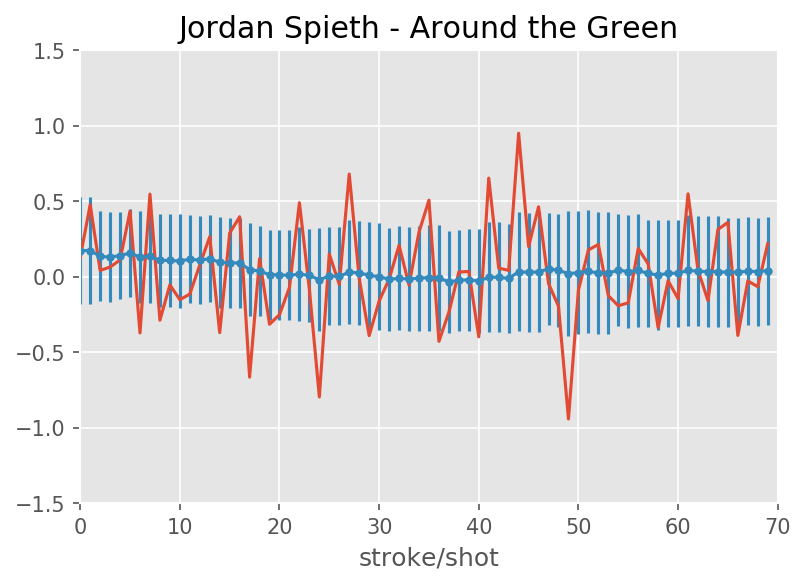

In [58]:
plot_series('Jordan Spieth', 'Around the Green')

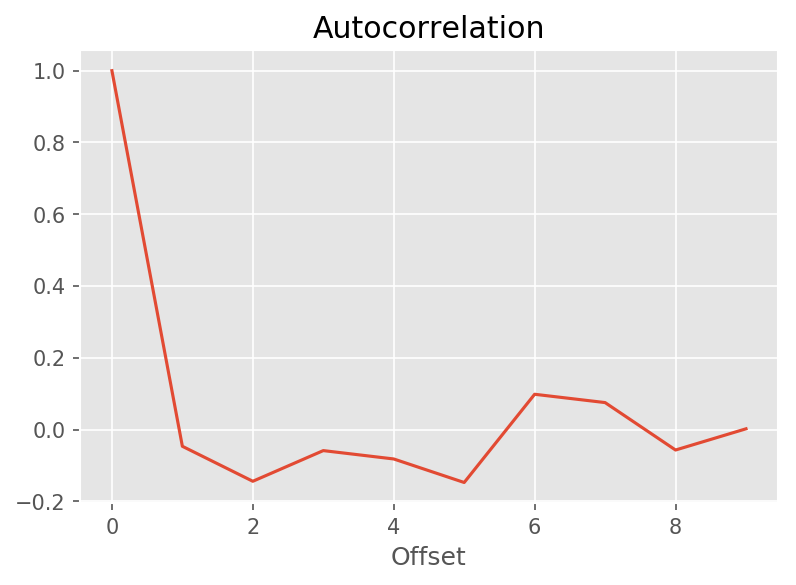

In [63]:
plot_auto_corr('Daniel Berger', 'Off the Tee')

In [55]:
def plot_series(name, category):
    sg = get_shot_series(name, category)
    window = 30
    rolling = sg.rolling(window).mean().as_matrix()[window:]
    std_roll = sg.rolling(window).std().as_matrix()[window:]
    sg = sg[window:]
    plt.plot(range(0, len(sg)), sg)
    plt.errorbar(range(0, len(rolling)), rolling, std_roll, linestyle=None, marker=".")
    plt.axis([0, len (sg), -1.5, 1.5])
    plt.title(name + ' - ' + category, loc='center')
    plt.xlabel('stroke/shot')

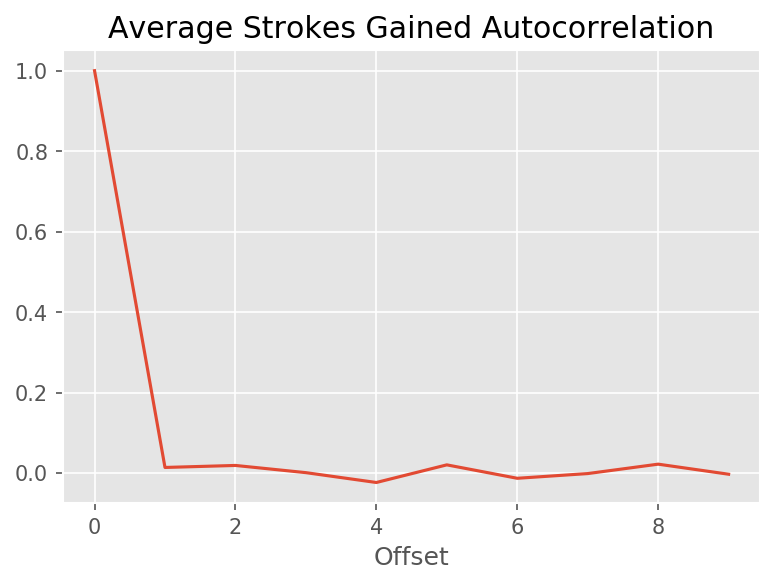

In [68]:
def get_average_corr(i):
    def get_corr(name,i):
        df = get_shot_series(name, 'Off the Tee')
        return df.autocorr(i)
    return np.mean([get_corr(p, i) for p in util.get_players()])
r = range(0, 10)
plt.title('Average Strokes Gained Autocorrelation', loc='center')
plt.xlabel('Offset')
foo = plt.plot(r, [get_average_corr(i) for i in r])

In [59]:
def plot_auto_corr(name, category):
    sg = get_shot_series(name, category)
    r = range(0, 10)
    plt.title('Autocorrelation', loc='center')
    plt.xlabel('Offset')
    foo = plt.plot(r, [sg.autocorr(i) for i in r])


In [57]:
def get_shot_series(name, category):
    sql_txt = '''
    select date, time, strokes_gained_baseline as sg
      from strokes s, players p
     where s.player_id = p.player_id
       and year = 2016
       and name = %s
       and strokes_gained_category like %s
       order by date, time
      limit 100;
    '''
    return util.pd_from_sql(sql_txt, [name, category])['sg']

In [94]:
player = 'Dustin Johnson'
year = 2016
sql_txt = '''
select name, sg_tee, sg_approach, sg_around, sg_putting from scores, players
    where year = %s
      and name like %s
      and scores.player_id = players.player_id
      and sg_putting is not null
      order by date;
'''
df = util.pd_from_sql(sql_txt, [year, player])
df.corr()

,sg_tee,sg_approach,sg_around,sg_putting
sg_tee,1.000000,0.042441,0.161099,-0.003025
sg_approach,0.042441,1.000000,0.035028,0.192628
sg_around,0.161099,0.035028,1.000000,-0.067000
sg_putting,-0.003025,0.192628,-0.067000,1.000000


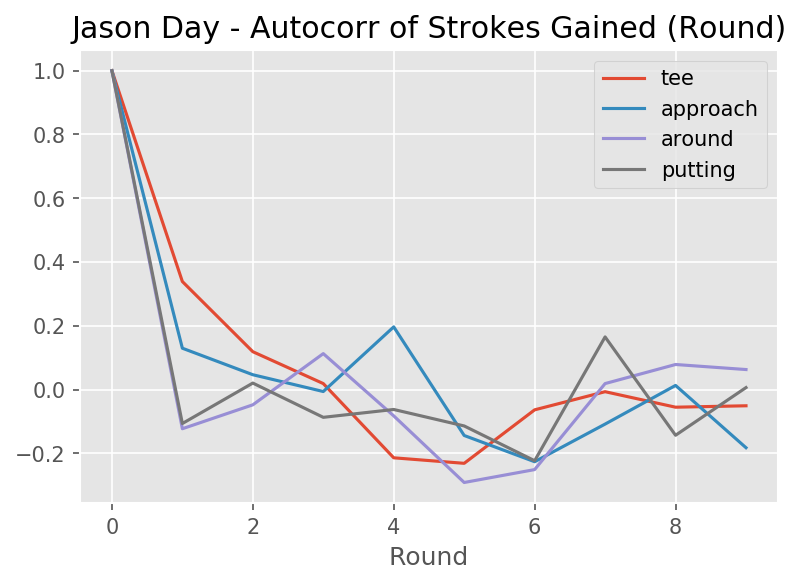

In [89]:
r = range(0, 10)
plt.plot(r, [ df['sg_tee'].autocorr(i) for i in r], label='tee')
plt.plot(r, [ df['sg_approach'].autocorr(i) for i in r], label='approach')
plt.plot(r, [ df['sg_around'].autocorr(i) for i in r], label='around')
plt.plot(r, [ df['sg_putting'].autocorr(i) for i in r], label='putting')
plt.legend(loc='upper right')
plt.title(player + ' - Autocorr of Strokes Gained (Round)')
foo = plt.xlabel('Round')

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


count    22.000000
mean      0.220409
std       0.327175
min      -0.562000
25%       0.081000
50%       0.167000
75%       0.422750
max       1.101000
Name: strokes_gained_baseline, dtype: float64

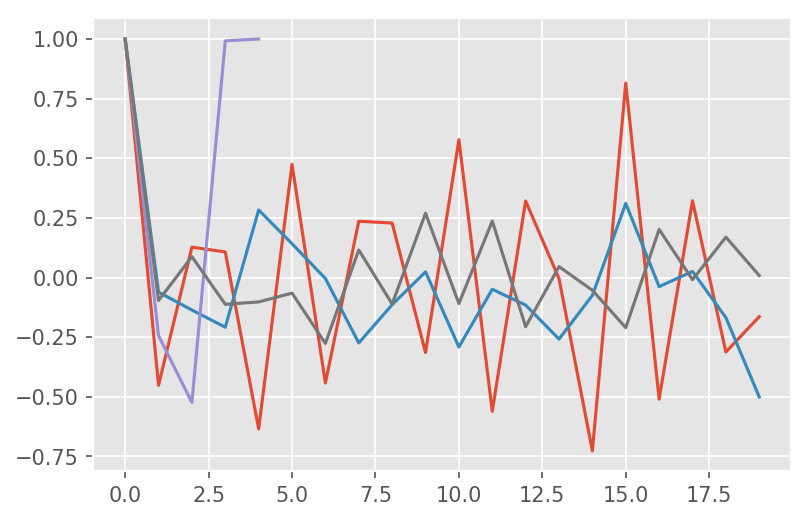

In [95]:
sqlTxt = '''
select strokes_gained_baseline, strokes_gained_category 
  from strokes 
  where player_id = 34046 
    and year = 2014 
    and strokes_gained_baseline is not null
  order by date limit 100;
  
'''
df = util.pd_from_sql(sqlTxt)
off_tee = df[df['strokes_gained_category']=='Off the Tee']['strokes_gained_baseline']
approach = df[df['strokes_gained_category']=='Approach to the Green']['strokes_gained_baseline']
around = df[df['strokes_gained_category']=='Around the Green']['strokes_gained_baseline']
putting = df[df['strokes_gained_category']=='Putting']['strokes_gained_baseline']
r = range(0, 20)
plt.plot(r, [off_tee.autocorr(i) for i in r])
# plt.plot(m_r(off_tee), off_tee)
plt.plot(r, [approach.autocorr(i) for i in r])
plt.plot(r, [around.autocorr(i) for i in r])
plt.plot(r, [putting.autocorr(i) for i in r])
off_tee.describe()

In [ ]:
sqlTxt = '''
select avg_score, avg_sg_tee + avg_sg_approach + avg_sg_around + avg_sg_putting as avg_sg from stats_view limit 180
'''
df = util.pd_from_sql(sqlTxt)
# foo = plt.errorbar(range(0, len (df)), df['avg_score'], df['std_score'], linestyle='None', marker='^')
plt.plot(range(0, len (df)), df['avg_sg'] + 71)
plt.plot(range(0, len (df)), df['avg_score'])